In [3]:
import pandas as pd
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins

In [4]:
# Carregar os dados 
penguins = load_penguins()

In [21]:
# Estatisticas descritivas para colunas selecionadas
print(penguins.iloc[:, 2:6].describe())
print(penguins.iloc[:, [0, 1, 6]].describe())

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000
       species  island   sex
count      344     344   333
unique       3       3     2
top     Adelie  Biscoe  male
freq       152     168   168


In [22]:
# Criando uma nova coluna para massa corporal em kg e selecionando colunas
pinguim = penguins.copy()
pinguim['body_mass_kg'] = pinguim['body_mass_g'] / 1000
pinguim = pinguim[['species', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_kg']].dropna()

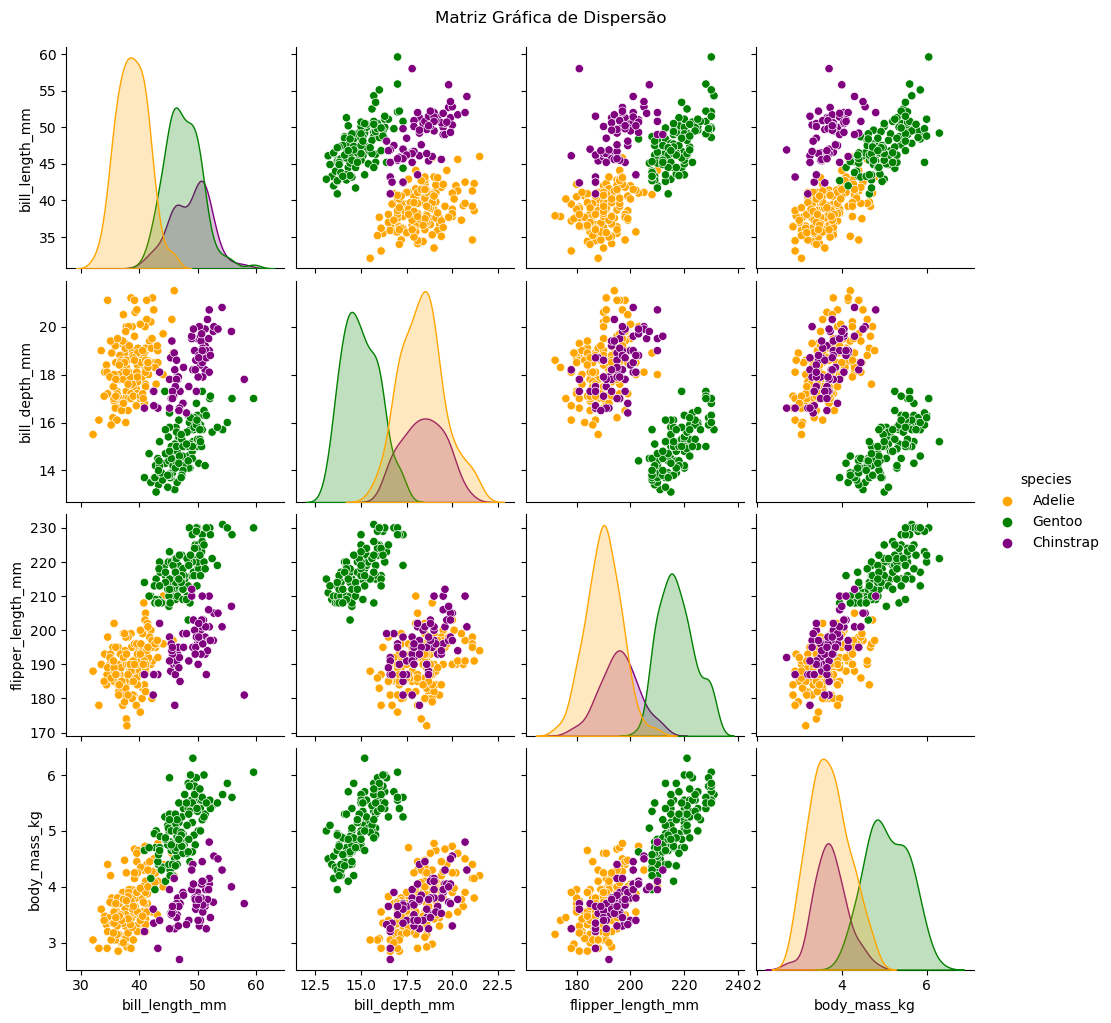

In [23]:
#Graficos de correlacao
sns.pairplot(pinguim, hue='species', palette=["orange", "green", "purple"])
plt.suptitle("Matriz Gráfica de Dispersão", y=1.02)
plt.show()

In [25]:
#separando o banco em treino(70 por cento) e teste(30 por cento)
np.random.seed(236038)
train, test = train_test_split(pinguim, test_size=0.3, random_state=236038)

# LDA com o banco completo
lda_total = LDA()
lda_total.fit(pinguim.iloc[:, 1:], pinguim['species'])

# LDA com dados de treino
lda_train = LDA()
lda_train.fit(train.iloc[:, 1:], train['species'])

# Previsao com o modelo treinado no banco completo
pred_total = lda_total.predict(pinguim.iloc[:, 1:])

# Previsao com o modelo treinado no conjunto de treino
pred_test = lda_train.predict(test.iloc[:, 1:])

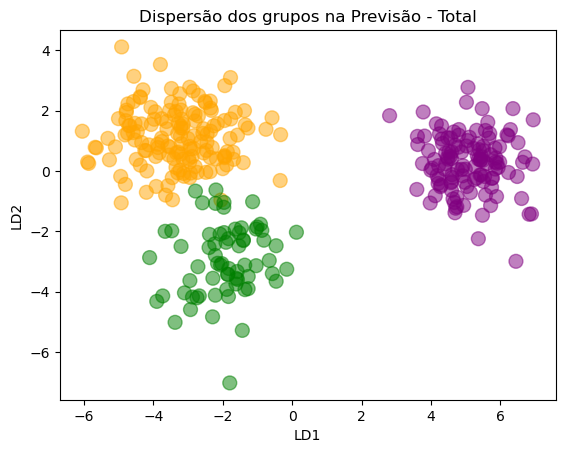

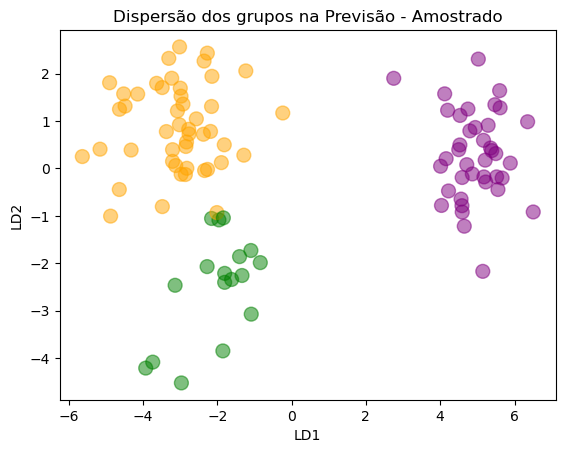

In [26]:
# Visualizacao para banco completo
plt.scatter(lda_total.transform(pinguim.iloc[:, 1:])[:, 0], lda_total.transform(pinguim.iloc[:, 1:])[:, 1],
            c=pinguim['species'].apply(lambda x: ['orange', 'green', 'purple'][['Adelie', 'Chinstrap', 'Gentoo'].index(x)]), s=100, alpha=0.5)
plt.title('Dispersão dos grupos na Previsão - Total')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()

# Visualizacao para banco de teste
plt.scatter(lda_train.transform(test.iloc[:, 1:])[:, 0], lda_train.transform(test.iloc[:, 1:])[:, 1],
            c=test['species'].apply(lambda x: ['orange', 'green', 'purple'][['Adelie', 'Chinstrap', 'Gentoo'].index(x)]), s=100, alpha=0.5)
plt.title('Dispersão dos grupos na Previsão - Amostrado')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.show()


In [27]:
# Matriz de Confusao e Acuracia para o banco completo
cm_total = confusion_matrix(pinguim['species'], pred_total)
accuracy_total = accuracy_score(pinguim['species'], pred_total)
print('Matriz de Confusão (Banco Completo):\n', cm_total)
print('Acurácia (Banco Completo):', round(accuracy_total, 3))

# Matriz de Confusao e Acuracia para o conjunto de teste
cm_test = confusion_matrix(test['species'], pred_test)
accuracy_test = accuracy_score(test['species'], pred_test)
print('Matriz de Confusão (Conjunto de Teste):\n', cm_test)
print('Acurácia (Conjunto de Teste):', round(accuracy_test, 3))


Matriz de Confusão (Banco Completo):
 [[150   1   0]
 [  3  65   0]
 [  0   0 123]]
Acurácia (Banco Completo): 0.988
Matriz de Confusão (Conjunto de Teste):
 [[46  1  0]
 [ 0 17  0]
 [ 0  0 39]]
Acurácia (Conjunto de Teste): 0.99
